In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the datasets
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [3]:
test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [4]:
#Checking the shape of train and test
print("Shape of train: ",train.shape)
print("Shape of test : ",test.shape)

Shape of train:  (38932, 5)
Shape of test :  (29404, 4)


In [5]:
#statistical summary
train.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id27056,This was the second time I had stayed at the h...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [6]:
#Checking columns
train.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [7]:
#Checking numer of happy and not happy customer
train['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [8]:
#Checking the Browser_used
train['Browser_Used'].value_counts()

Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64

In [9]:
train['Device_Used'].value_counts()

Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64

# Data Preprocessing

In [10]:
#'User_ID','Browser_Used' and 'Device_Used' is not giving any important information to the target so we can drop the redundant columns.
#from the train and test datasets.

In [11]:
#We apply same function to both train and test datasets.
train=train.drop(['User_ID','Browser_Used','Device_Used'],axis=1)
test=test.drop(['User_ID','Browser_Used','Device_Used'],axis=1)
train.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [12]:
test.head()

,Description
0,Looking for a motel in close proximity to TV t...
1,Walking distance to Madison Square Garden and ...
2,Visited Seattle on business. Spent - nights in...
3,This hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...


In [13]:
#Changing the label name Is_Response to Response
train.rename(columns={'Is_Response':'Response'},inplace=True)
train.head()

,Description,Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [14]:
train['length']=train['Description'].str.len()
test['length']=test['Description'].str.len()
train.head()

,Description,Response,length
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077
2,I booked this hotel through Hotwire at the low...,not happy,1327
3,Stayed here with husband and sons on the way t...,happy,502
4,My girlfriends and I stayed here to celebrate ...,not happy,1613


In [15]:
#Lower case Description
train.Description=train.Description.str.lower()
test.Description=test.Description.str.lower()
test.head()

,Description,length
0,looking for a motel in close proximity to tv t...,676
1,walking distance to madison square garden and ...,588
2,visited seattle on business. spent - nights in...,863
3,this hotel location is excellent and the rooms...,778
4,this hotel is awesome i love the service antho...,255


In [16]:
#Remove stopwords
stop_words=stopwords.words('english')
train['Description']=train['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in stop_words))

test['Description']=test['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in stop_words))

In [17]:
#Removing Punctuations from both the sets
train['Description']=train['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in string.punctuation))

test['Description']=test['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in string.punctuation))
train.head()

,Description,Response,length
0,room kind clean strong smell dogs. generally a...,not happy,248
1,"stayed crown plaza april -- april --, ----. st...",not happy,1077
2,booked hotel hotwire lowest price could find. ...,not happy,1327
3,stayed husband sons way alaska cruise. loved h...,happy,502
4,girlfriends stayed celebrate --th birthdays. p...,not happy,1613


In [18]:
#Again Removing punctuations
train['Description']=train['Description'].str.replace(r'[^\w\d\s]',' ')

test['Description']=test['Description'].str.replace(r'[^\w\d\s]',' ')
#Remove extra spaces used with single space
train['Description']=train['Description'].str.replace(r'\s+]',' ')

test['Description']=test['Description'].str.replace(r'\s+]',' ')
train.head()

,Description,Response,length
0,room kind clean strong smell dogs generally a...,not happy,248
1,stayed crown plaza april april st...,not happy,1077
2,booked hotel hotwire lowest price could find ...,not happy,1327
3,stayed husband sons way alaska cruise loved h...,happy,502
4,girlfriends stayed celebrate th birthdays p...,not happy,1613


In [19]:
#Remove leading and trailing spaces
train['Description']=train['Description'].str.replace(r'^\s+|\s+?$',' ')

test['Description']=test['Description'].str.replace(r'^\s+|\s+?$',' ')
train.head()

,Description,Response,length
0,room kind clean strong smell dogs generally a...,not happy,248
1,stayed crown plaza april april st...,not happy,1077
2,booked hotel hotwire lowest price could find ...,not happy,1327
3,stayed husband sons way alaska cruise loved h...,happy,502
4,girlfriends stayed celebrate th birthdays p...,not happy,1613


In [20]:
#Remove leading and trailing tabs
train['Description']=train['Description'].str.replace(r'^\t+|\t+?$',' ')

test['Description']=test['Description'].str.replace(r'^\t+|\t+?$',' ')
train.head()

,Description,Response,length
0,room kind clean strong smell dogs generally a...,not happy,248
1,stayed crown plaza april april st...,not happy,1077
2,booked hotel hotwire lowest price could find ...,not happy,1327
3,stayed husband sons way alaska cruise loved h...,happy,502
4,girlfriends stayed celebrate th birthdays p...,not happy,1613


In [21]:
#Clean_length after punctuations,stopwords removal
train['cleaned_length']=train['Description'].str.len()

test['cleaned_length']=test['Description'].str.len()
train.head()

,Description,Response,length,cleaned_length
0,room kind clean strong smell dogs generally a...,not happy,248,144
1,stayed crown plaza april april st...,not happy,1077,714
2,booked hotel hotwire lowest price could find ...,not happy,1327,900
3,stayed husband sons way alaska cruise loved h...,happy,502,358
4,girlfriends stayed celebrate th birthdays p...,not happy,1613,1048


In [22]:
#Mapping the response label
train['Response'].replace({'happy':1,'not happy':0},inplace=True)
train.head()

,Description,Response,length,cleaned_length
0,room kind clean strong smell dogs generally a...,0,248,144
1,stayed crown plaza april april st...,0,1077,714
2,booked hotel hotwire lowest price could find ...,0,1327,900
3,stayed husband sons way alaska cruise loved h...,1,502,358
4,girlfriends stayed celebrate th birthdays p...,0,1613,1048


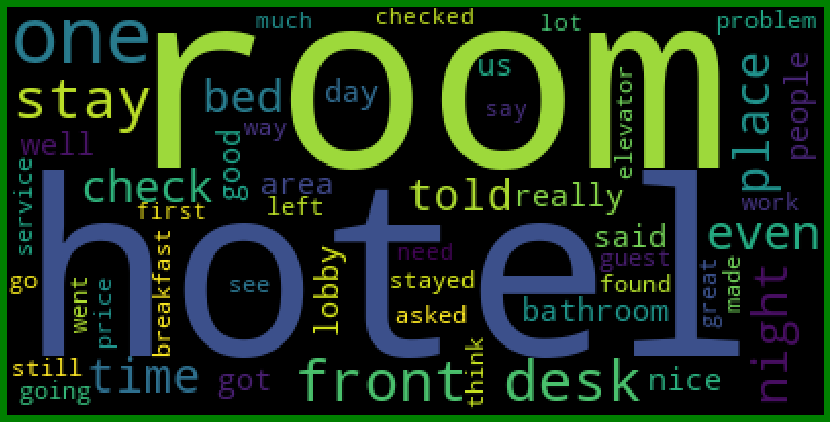

In [23]:
#Now the description is cleaned 
#we see some loud words used for negative reviews
from wordcloud import WordCloud
negatives=train['Description'][train['Response']==0]

neg_cloud=WordCloud(max_words=50).generate(' '.join(negatives))
plt.figure(figsize=(12,10),facecolor='g')
plt.imshow(neg_cloud)
plt.tight_layout()
plt.axis('off')
plt.show()

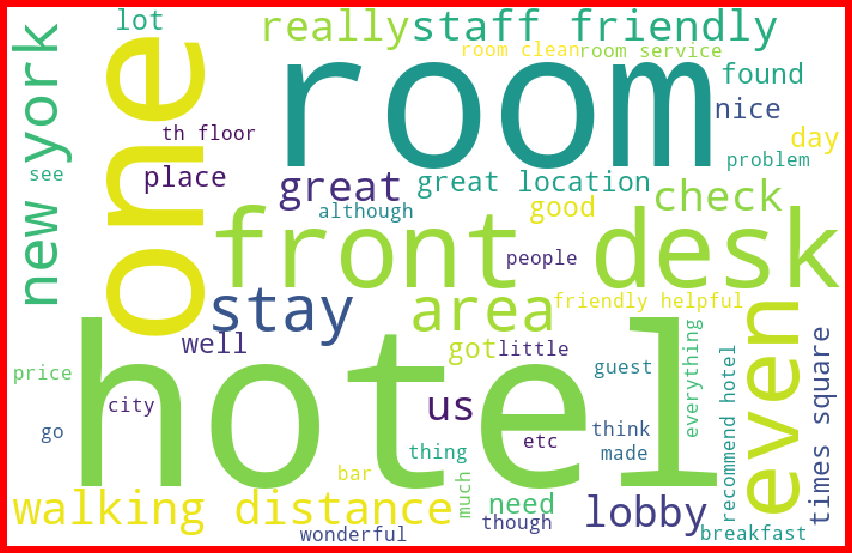

In [24]:
#Loud words used for positive review
positives=train['Description'][train['Response']==1]

pos_cloud=WordCloud(width=700,height=450,background_color='white',max_words=50).generate(' '.join(positives))
plt.figure(figsize=(12,10),facecolor='r')
plt.imshow(pos_cloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [27]:
#Vectorize all the text columns from both the sets to machine learnable format
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(train['Description'])

Test=tfidf.transform(test['Description'])

In [28]:
y=train['Response']
y

0        0
1        0
2        0
3        1
4        0
        ..
38927    1
38928    0
38929    0
38930    0
38931    1
Name: Response, Length: 38932, dtype: int64

Machine Learning to predict Positive or Negative

In [29]:
#Check at which random state the machine perform good to predict
max_acc_scr=0
for r_state in range(42,101):
    train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=r_state,test_size=0.25)
    mnb=MultinomialNB()
    mnb.fit(train_X,train_y)
    pred=mnb.predict(test_X)
    acc_scr=accuracy_score(pred,test_y)
    if acc_scr>max_acc_scr:
        max_acc_scr=acc_scr
        final_r_state=r_state
    print('Max Accuracy score corresponding to ',final_r_state,' is ',max_acc_scr)    

Max Accuracy score corresponding to  42  is  0.8064317271139423
Max Accuracy score corresponding to  42  is  0.8064317271139423
Max Accuracy score corresponding to  44  is  0.8078701325387856
Max Accuracy score corresponding to  45  is  0.8109524298777355
Max Accuracy score corresponding to  45  is  0.8109524298777355
Max Accuracy score corresponding to  45  is  0.8109524298777355
Max Accuracy score corresponding to  45  is  0.8109524298777355
Max Accuracy score corresponding to  45  is  0.8109524298777355
Max Accuracy score corresponding to  45  is  0.8109524298777355
Max Accuracy score corresponding to  51  is  0.8113634028562622
Max Accuracy score corresponding to  51  is  0.8113634028562622
Max Accuracy score corresponding to  51  is  0.8113634028562622
Max Accuracy score corresponding to  51  is  0.8113634028562622
Max Accuracy score corresponding to  51  is  0.8113634028562622
Max Accuracy score corresponding to  51  is  0.8113634028562622
Max Accuracy score corresponding to  51 

In [30]:
#Checking the fitting of the model
from sklearn.model_selection import GridSearchCV,cross_val_score
import numpy as np
a_score=cross_val_score(mnb,X,y,cv=5)
print(a_score)
print(np.mean(a_score))

[0.80572676 0.80965836 0.81222707 0.80490624 0.81132802]
0.8087692922291746


In [31]:
#final splitting
train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=80,test_size=0.25)
#Checking which model predict the best
model=[MultinomialNB(),LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    m.fit(train_X,train_y)
    predm=m.predict(test_X)
    print("Model",m)
    print("\n")
    print('Accuracy Score: ',accuracy_score(predm,test_y))
    print("\n")
    print("Confusion Matrix: \n",confusion_matrix(predm,test_y))
    print("Classification Report: \n",classification_report(predm,test_y))
    print("\n")

Model MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Accuracy Score:  0.8137264974827905


Confusion Matrix: 
 [[1256   64]
 [1749 6664]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.95      0.58      1320
           1       0.99      0.79      0.88      8413

    accuracy                           0.81      9733
   macro avg       0.70      0.87      0.73      9733
weighted avg       0.91      0.81      0.84      9733



Model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score:  0.888215349840748


Confusion Matrix: 
 [[2315  398]
 [ 690 6330]]
Classification Report: 
               precision    recall  f1-score   suppor

In [32]:
#Checking the result by ensemble techniques
model=[AdaBoostClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(train_X,train_y)
    predm=m.predict(test_X)
    print("Model",m)
    print("\n")
    print('Accuracy Score: ',accuracy_score(predm,test_y))
    print("\n")
    print("Confusion Matrix: \n",confusion_matrix(predm,test_y))
    print("Classification Report: \n",classification_report(predm,test_y))
    print("\n")

Model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


Accuracy Score:  0.8331449707181753


Confusion Matrix: 
 [[2032  651]
 [ 973 6077]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.76      0.71      2683
           1       0.90      0.86      0.88      7050

    accuracy                           0.83      9733
   macro avg       0.79      0.81      0.80      9733
weighted avg       0.84      0.83      0.84      9733



Model GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n

In [45]:
#Logistic Regression has highest f1 score,precision,recall as well as accuracy as compared to other classifiers so we finalize the model for Predicting the positive and negative reviews
#Using GridSearchCV to get the best parameter
lr=LogisticRegression()
param={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
Gd_sr=GridSearchCV(estimator=lr,cv=5,scoring="f1",param_grid=param)
Gd_sr.fit(train_X,train_y)
best_param=Gd_sr.best_params_
print(best_param)
best_score=Gd_sr.best_score_
print(best_score)

{'solver': 'liblinear'}
0.9149636192475832


In [47]:
#final model
Lr=LogisticRegression(solver="liblinear")
Lr.fit(train_X,train_y)
Lrpred=Lr.predict(test_X)
print("Accuracy Score: ",accuracy_score(Lrpred,test_y))
print("Confusion Matrix: \n",confusion_matrix(Lrpred,test_y))
print('Classification Report: \n',classification_report(Lrpred,test_y))

Accuracy Score:  0.888215349840748
Confusion Matrix: 
 [[2315  398]
 [ 690 6330]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      2713
           1       0.94      0.90      0.92      7020

    accuracy                           0.89      9733
   macro avg       0.86      0.88      0.87      9733
weighted avg       0.89      0.89      0.89      9733



# Test Data

In [48]:
#Now we predict the Test data set to predict the reviews if they are positive or negative
Pred_Test=Lr.predict(Test)
print(Pred_Test)

[0 1 1 ... 1 1 1]


In [49]:
len(Pred_Test)

29404

In [51]:
#check the 4th index prediction
Pred_Test[4]

1

In [52]:
Pred_Test[400]

0

In [53]:
#Saving the prediction in csv
df=pd.DataFrame(Pred_Test)
df.to_csv('pred_Sentiment.csv')

In [54]:
#Saving the model for production
from sklearn.externals import joblib
joblib.dump(Lr,"pred_Sentiment.obj")

['pred_Sentiment.obj']